# Breast Cancer Dataset

## imports

In [1]:
# set plots inline for ipython
%matplotlib inline

# general python imports
from time import time

# Standard scientific Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
plt.style.use('fivethirtyeight')

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# import datasets, preprocessing, piplining, evaluation
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from scipy.spatial.distance import cdist
from scipy.stats import kurtosis
from sklearn.metrics import accuracy_score
from scipy.stats import variation
import scipy.sparse as sps
from scipy.linalg import pinv


# clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM


# dimensionality reduction
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection 
from sklearn.random_projection import SparseRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Supervised learning
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
cfont = {'fontname':'Comic Sans MS', 'fontsize':18}
hfont = {'fontname':'Comic Sans MS', 'fontsize':14}
vfont = {'fontname':'Comic Sans MS', 'fontsize':14}

/Users/qizhang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# set the figure sizes
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': (4,3)})

## load data

In [3]:
# load data
cancer=pd.read_csv('breast-cancer-w-diag.csv', header=0)
cancer.drop('id',axis=1,inplace=True)
cancer.drop('Unnamed: 32',axis=1,inplace=True)
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})

In [4]:
train,test=train_test_split(cancer,test_size=0.2,random_state=0,stratify=cancer['diagnosis'])# stratify the outcome
X=train[train.columns[1:31]] # X train
X_test=test[test.columns[1:31]]
y=train['diagnosis'] # y train
y_test=test['diagnosis']

# fit a standardScaler to normalize all input to zero mean and unit variance
scaler = StandardScaler().fit(X)
X=scaler.transform(X)
X_test = scaler.transform(X_test)
y = np.array(y)
y_test=np.array(y_test)

In [5]:
print (X.shape)
print(X_test.shape)

(455, 30)
(114, 30)


# 1. Clustering

## 1.1 k-means clustering
http://scikit-learn.org/stable/modules/clustering.html

In [6]:
#find optimized cluster number
meandist = []
ARI = []
AMI = []
h_score = []
c_score = []
V_measure = []
for k in range(1,11):
    kmeans = KMeans(init='random', n_clusters=k, n_init=10)
    Z = kmeans.fit_predict(X)
    # cluster average within k-means SSE
    min_ = np.min(np.square(cdist(X, kmeans.cluster_centers_, 'euclidean')), axis = 1)
    value = np.mean(min_)
    meandist.append(value)
    # other scores
    ARI.append(metrics.adjusted_rand_score(y, Z))
    AMI.append(metrics.adjusted_mutual_info_score(y, Z))
    h, c, V = metrics.homogeneity_completeness_v_measure(y, Z)
    h_score.append(h)
    c_score.append(c)
    V_measure.append(V)

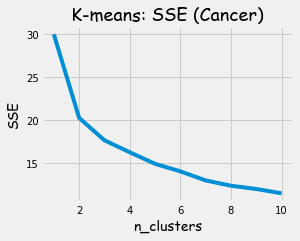

In [7]:
k = range(1, 11)
f = plt.figure()
plt.plot(k, meandist)

#plt.legend(loc='lower right')

plt.title("K-means: SSE (Cancer)", **cfont)

plt.xlabel('n_clusters', **hfont)
plt.ylabel('SSE', **vfont);
plt.show()
f.savefig("cancer_01.pdf", bbox_inches='tight')


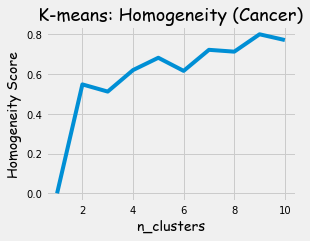

In [8]:
k = range(1, 11)
f = plt.figure()
plt.plot(k, h_score)

plt.title("K-means: Homogeneity (Cancer)", **cfont)
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Homogeneity Score', **hfont);
plt.show()
f.savefig("cancer_02.pdf", bbox_inches='tight')



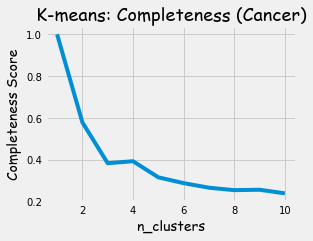

In [9]:
k = range(1, 11)
f = plt.figure()
plt.plot(k, c_score)

plt.title("K-means: Completeness (Cancer)", **cfont)
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Completeness Score', **vfont);
plt.show()
f.savefig("cancer_03.pdf", bbox_inches='tight')



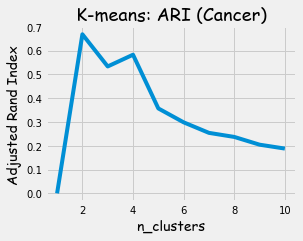

In [10]:
k = range(1, 11)
f = plt.figure()


plt.plot(k, ARI)

plt.title("K-means: ARI (Cancer)", **cfont)
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Adjusted Rand Index', **vfont);
plt.show()
f.savefig("cancer_04.pdf", bbox_inches='tight')



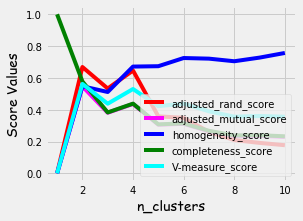

In [37]:
k = range(1, 11)
f = plt.figure()


plt.plot(k, ARI, color='red', label='adjusted_rand_score')
plt.plot(k, AMI, color='magenta', label='adjusted_mutual_score')
plt.plot(k, h_score, color='blue', label='homogeneity_score')
plt.plot(k, c_score, color='green', label='completeness_score')
plt.plot(k, V_measure, color='cyan', label='V-measure_score')

plt.legend(loc='lower right')
#plt.title("KNN: unweighted (Cancer)")
#plt.ylim(0.92, 1.01)
#plt.xticks(np.arange(0,2.1,0.5))
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Score Values', **vfont);
plt.show()
f.savefig("cancer_05.pdf", bbox_inches='tight')



### improve K-means performance

In [40]:
# random init
start = time()
kmeans1 = KMeans(init='random', n_clusters=2, n_init=10)
Z = kmeans1.fit_predict(X)
print ('time: ', time() - start)
# cluster average within k-means SSE
min_ = np.min(np.square(cdist(X, kmeans.cluster_centers_, 'euclidean')), axis = 1)
value = np.mean(min_)
# other scores
ARI=metrics.adjusted_rand_score(y, Z)
AMI=metrics.adjusted_mutual_info_score(y, Z)
h, c, V = metrics.homogeneity_completeness_v_measure(y, Z)
print(value, ARI, AMI, h, c, V)

time:  0.020811796188354492
11.4919847573 0.668662776281 0.546773061289 0.547529988371 0.578136772795 0.562417282638


In [41]:
# k-means++ init
start = time()
kmeans1 = KMeans(init='k-means++', n_clusters=2, n_init=10)
Z = kmeans1.fit_predict(X)
print ('time: ', time() - start)
# cluster average within k-means SSE
min_ = np.min(np.square(cdist(X, kmeans.cluster_centers_, 'euclidean')), axis = 1)
value = np.mean(min_)
# other scores
ARI=metrics.adjusted_rand_score(y, Z)
AMI=metrics.adjusted_mutual_info_score(y, Z)
h, c, V = metrics.homogeneity_completeness_v_measure(y, Z)
print (value, ARI, AMI, h, c, V)

time:  0.03338217735290527
11.4919847573 0.668662776281 0.546773061289 0.547529988371 0.578136772795 0.562417282638


## 1.2 EM clustering

In [42]:
#find optimized cluster number
ll = [] # log likelyhood
ARI = []
AMI = []
h_score = []
c_score = []
V_measure = []
bic = []
aic = []
for k in range(1,11):
    gmm = GMM(n_components=k, covariance_type='spherical')
    gmm.fit(X)
    Z = gmm.predict(X)
    ll.append(gmm.score(X))
    ARI.append(metrics.adjusted_rand_score(y, Z))
    AMI.append(metrics.adjusted_mutual_info_score(y, Z))
    h, c, V = metrics.homogeneity_completeness_v_measure(y, Z)
    h_score.append(h)
    c_score.append(c)
    V_measure.append(V)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

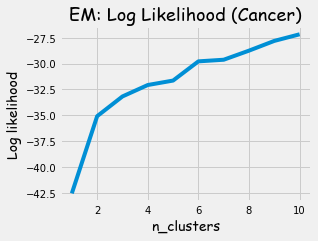

In [44]:
k = range(1, 11)
f = plt.figure()
plt.plot(k, ll)

plt.title("EM: Log Likelihood (Cancer)", **cfont)
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Log likelihood', **vfont);
plt.show()
f.savefig("cancer_06.pdf", bbox_inches='tight')



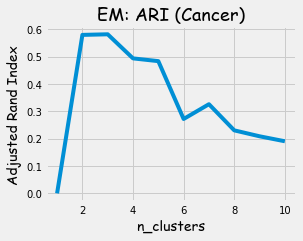

In [48]:
k = range(1, 11)
f = plt.figure()
plt.plot(k, ARI)

plt.title("EM: ARI (Cancer)", **cfont)
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Adjusted Rand Index', **vfont);
plt.show()
f.savefig("cancer_06.pdf", bbox_inches='tight')



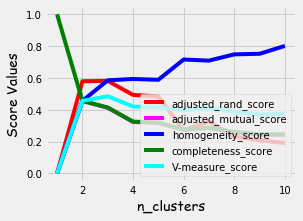

In [47]:
k = range(1, 11)
f = plt.figure()
plt.plot(k, ARI, color='red', label='adjusted_rand_score')
plt.plot(k, AMI, color='magenta', label='adjusted_mutual_score')
plt.plot(k, h_score, color='blue', label='homogeneity_score')
plt.plot(k, c_score, color='green', label='completeness_score')
plt.plot(k, V_measure, color='cyan', label='V-measure_score')

plt.legend(loc='lower right')
#plt.title("KNN: unweighted (Cancer)")
#plt.ylim(0.92, 1.01)
#plt.xticks(np.arange(0,2.1,0.5))
plt.xlabel('n_clusters', **hfont)
plt.ylabel('Score Values', **vfont);
plt.show()
f.savefig("cancer_07.pdf", bbox_inches='tight')



### improve EM

In [62]:
# spherical - kmeans start
start = time()
clf = GMM(n_components=2, covariance_type='spherical', random_state=42)
clf.fit(X)
clusters_EM = clf.predict(X)
print ('time: ', time() - start)

# scores
ll = clf.score(X)
ARI=metrics.adjusted_rand_score(y, clusters_EM)
AMI=metrics.adjusted_mutual_info_score(y, clusters_EM)
h, c, V = metrics.homogeneity_completeness_v_measure(y, clusters_EM)
print ('log likelihood, ARI, AMI, h, c, V')
print (ll, ARI, AMI, h, c, V)

time:  0.006094932556152344
log likelihood, ARI, AMI, h, c, V
-35.0979601106 0.579085621627 0.45461012669 0.455520603882 0.455520603882 0.455520603882


In [54]:
# spherical - random start
start = time()
clf = GMM(n_components=2, covariance_type='spherical', init_params='random',random_state=42)
clf.fit(X)
clusters_EM = clf.predict(X)
print ('time: ', time() - start)

# scores
ll = clf.score(X)
ARI=metrics.adjusted_rand_score(y, clusters_EM)
AMI=metrics.adjusted_mutual_info_score(y, clusters_EM)
h, c, V = metrics.homogeneity_completeness_v_measure(y, clusters_EM)
print ('log likelihood, ARI, AMI, h, c, V')
print (ll, ARI, AMI, h, c, V)

time:  0.003729104995727539
log likelihood, ARI, AMI, h, c, V
-35.0979776347 0.572300393066 0.447392645964 0.448315183596 0.449093902384 0.448704205127


In [55]:
# spherical - kmeans start
start = time()
clf = GMM(n_components=2, covariance_type='full', random_state=42)
clf.fit(X)
clusters_EM = clf.predict(X)
print ('time: ', time() - start)

# scores
ll = clf.score(X)
ARI=metrics.adjusted_rand_score(y, clusters_EM)
AMI=metrics.adjusted_mutual_info_score(y, clusters_EM)
h, c, V = metrics.homogeneity_completeness_v_measure(y, clusters_EM)
print ('log likelihood, ARI, AMI, h, c, V')
print (ll, ARI, AMI, h, c, V)

time:  0.01288294792175293
log likelihood, ARI, AMI, h, c, V
0.528238901122 0.736734192965 0.615541978445 0.616183828195 0.620605056283 0.618386539816


In [58]:
# tied - kmeans start
start = time()
clf = GMM(n_components=2, covariance_type='tied', random_state=42)
clf.fit(X)
clusters_EM = clf.predict(X)
print ('time: ', time() - start)
# scores
ll = clf.score(X)
ARI=metrics.adjusted_rand_score(y, clusters_EM)
AMI=metrics.adjusted_mutual_info_score(y, clusters_EM)
h, c, V = metrics.homogeneity_completeness_v_measure(y, clusters_EM)
print ('log likelihood, ARI, AMI, h, c, V')
print (ll, ARI, AMI, h, c, V)

time:  0.011065244674682617
log likelihood, ARI, AMI, h, c, V
-6.88067416499 0.652965953679 0.563294497287 0.564024115109 0.625146145249 0.59301432796


In [60]:
# diag - kmeans start
start = time()
clf = GMM(n_components=2, covariance_type='diag', random_state=42)
clf.fit(X)
clusters_EM = clf.predict(X)
print( 'time: ', time() - start)

# scores
ll = clf.score(X)
ARI=metrics.adjusted_rand_score(y, clusters_EM)
AMI=metrics.adjusted_mutual_info_score(y, clusters_EM)
h, c, V = metrics.homogeneity_completeness_v_measure(y, clusters_EM)
print ('log likelihood, ARI, AMI, h, c, V')
print (ll, ARI, AMI, h, c, V)

time:  0.005007028579711914
log likelihood, ARI, AMI, h, c, V
-32.3467408015 0.670101502522 0.545894302802 0.547581899491 0.546651091745 0.547116099723


## 1.3 Compare k means and EM

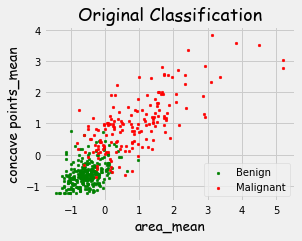

In [20]:
# original class
f = plt.figure()


k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if y[j] == i])
    ax.scatter(points[:, 3], points[:, 7], s=7, c=colors[i], label=labels[i])
plt.xlabel("area_mean", **hfont)
plt.ylabel("concave points_mean", **vfont)
plt.legend(loc=4)
plt.title('Original Classification', **cfont)
plt.show()
fig.savefig("cancer_08.pdf", bbox_inches='tight')



time:  0.019856929779052734
value, ARI, AMI, h, c, V
11.4714578581 0.668662776281 0.546773061289 0.547529988371 0.578136772795 0.562417282638


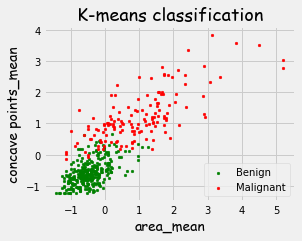

wrongly labeled: 0.09010989010989011


In [19]:
# K means classification
start = time()
clf = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=42)
Z=clf.fit_predict(X)
print ('time: ', time() - start)

# cluster average within k-means SSE
min_ = np.min(np.square(cdist(X, kmeans.cluster_centers_, 'euclidean')), axis = 1)
value = np.mean(min_)
# other scores
ARI=metrics.adjusted_rand_score(y, Z)
AMI=metrics.adjusted_mutual_info_score(y, Z)
h, c, V = metrics.homogeneity_completeness_v_measure(y, Z)
print ('value, ARI, AMI, h, c, V')
print (value, ARI, AMI, h, c, V)


# fix labels
#clusters_kmeans = np.choose(clf.labels_, [1, 0])
clusters_kmeans = clf.labels_

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']
f = plt.figure()
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters_kmeans[j] == i])
    ax.scatter(points[:, 3], points[:, 7], s=7, c=colors[i], label=labels[i])

# wrongly labeled points
points = np.array([X[j] for j in range(len(X)) if y[j] != clusters_kmeans[j]])
#ax.scatter(points[:, 3], points[:, 7], s=80, facecolors='none', edgecolors='m', label='Wrongly Labeled')
plt.xlabel("area_mean",**hfont)
plt.ylabel("concave points_mean", **vfont)
plt.legend(loc=4)
plt.title('K-means classification',**cfont)
plt.show()
fig.savefig("cancer_09.pdf", bbox_inches='tight')


print ('wrongly labeled:', 1.0*len(points)/len(X))

time:  0.005520343780517578
log likelihood, ARI, AMI, h, c, V
-35.0979601106 0.579085621627 0.45461012669 0.455520603882 0.455520603882 0.455520603882


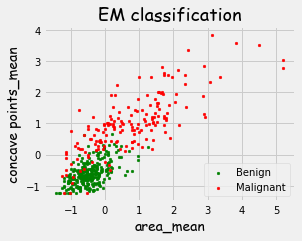

wrongly labeled: 0.11868131868131868


In [18]:
# EM classification
start = time()
clf = GMM(n_components=2, covariance_type='spherical', random_state=42)
clf.fit(X)
clusters_EM = clf.predict(X)
print ('time: ', time() - start)
f = plt.figure()


# scores
ll = clf.score(X)
ARI=metrics.adjusted_rand_score(y, clusters_EM)
AMI=metrics.adjusted_mutual_info_score(y, clusters_EM)
h, c, V = metrics.homogeneity_completeness_v_measure(y, clusters_EM)
print ('log likelihood, ARI, AMI, h, c, V')
print (ll, ARI, AMI, h, c, V)

# fix labels
#clusters_EM = np.choose(clusters_EM, [1, 0])

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters_EM[j] == i])
    ax.scatter(points[:, 3], points[:, 7], s=7, c=colors[i], label=labels[i])

# wrongly labeled points
points = np.array([X[j] for j in range(len(X)) if y[j] != clusters_EM[j]])
#ax.scatter(points[:, 1], points[:, 2], s=80, facecolors='none', edgecolors='m', label='Wrongly Labeled')
plt.xlabel("area_mean", **vfont)
plt.ylabel("concave points_mean", **vfont)
plt.legend(loc=4)
plt.title('EM classification', **cfont)
plt.show()
fig.savefig("cancer_10.pdf", bbox_inches='tight')


print ('wrongly labeled:', 1.0*len(points)/len(X))

# 2. Dimensionality Reduction

## 2.1 PCA

### PCA - select pca parameter

In [25]:
pca = PCA()
pca.fit(X)
print (pca.explained_variance_ratio_)

[  4.45454545e-01   1.85448704e-01   9.90831818e-02   6.51567607e-02
   5.37436250e-02   3.84563412e-02   2.33120568e-02   1.59084644e-02
   1.41334599e-02   1.16610179e-02   9.60041499e-03   8.89355380e-03
   7.70617662e-03   4.59602101e-03   3.13887853e-03   2.67828805e-03
   2.06513860e-03   1.89340236e-03   1.62225436e-03   1.05520439e-03
   9.51357685e-04   9.10161122e-04   8.38992627e-04   5.99519693e-04
   5.11511518e-04   2.77413528e-04   2.19859253e-04   5.52386214e-05
   2.45569297e-05   3.90006739e-06]


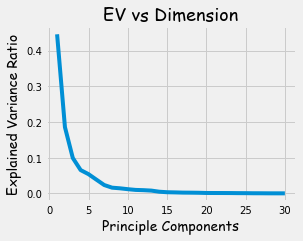

In [26]:
#Plot Variance Ratio for PCA
f = plt.figure()
plt.plot(range(1, 31), pca.explained_variance_ratio_)
plt.xlabel('Principle Components', **vfont)
plt.ylabel('Explained Variance Ratio', **vfont)
plt.title('EV vs Dimension', **cfont)
plt.show()
f.savefig("cancer_11.pdf", bbox_inches='tight')


plt.clf()

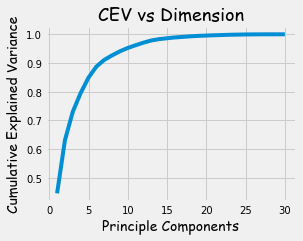

In [27]:
f = plt.figure()

cummulative_explained_variance_ = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 31), cummulative_explained_variance_)
plt.xlabel('Principle Components',**vfont)
plt.ylabel('Cumulative Explained Variance',**vfont)
plt.title('CEV vs Dimension',**cfont)
plt.show()
plt.clf()
f.savefig("cancer_12.pdf", bbox_inches='tight')



In [28]:
acc = []
rmse_pca = []
for i in range (1, 31):
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_projected = pca.inverse_transform(X_pca)
    mse = ((X - X_projected)**2).mean()
    rmse_pca.append(np.sqrt(mse))
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_pca, y)
    acc.append(clf.score(X_pca, y))

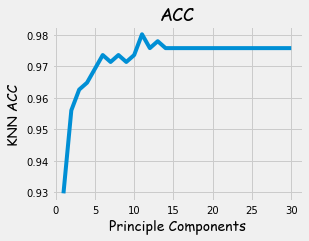

In [29]:
f = plt.figure()

plt.plot(range(1, 31), acc)
plt.xlabel('Principle Components', **hfont)
plt.ylabel('KNN ACC', **vfont)
plt.title('ACC', **cfont)
plt.show()
plt.clf()
f.savefig("cancer_13.pdf", bbox_inches='tight')



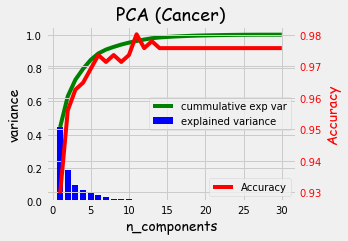

In [30]:
# final graph
fig, ax1 = plt.subplots()
x_range = range(1, 31)
ax1.bar(x_range, pca.explained_variance_ratio_, color='blue', label='explained variance')
ax1.plot(x_range, cummulative_explained_variance_, color='green', label='cummulative exp var')
ax1.set_xlabel('n_components', **vfont)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('variance',  **vfont)
ax1.legend(loc=5)

#ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_range, acc, color='red', label='Accuracy')
ax2.set_ylabel('Accuracy', color='r', **vfont)
ax2.tick_params('y', colors='r')
ax2.legend(loc=4)

plt.title('PCA (Cancer)', **cfont)
plt.show()
fig.savefig("cancer_14.pdf", bbox_inches='tight')



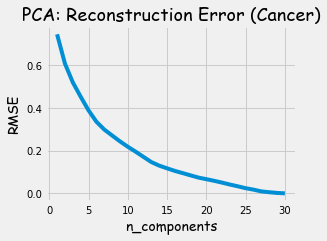

In [31]:
f = plt.figure()
plt.plot(range(1, 31), rmse_pca)
plt.xlabel('n_components', **vfont)
plt.title('PCA: Reconstruction Error (Cancer)', **cfont)
plt.ylabel('RMSE', **vfont)
plt.show()
f.savefig("cancer_15.pdf", bbox_inches='tight')
plt.clf()

## 2.2 ICA

### ICA parameter

In [62]:
ic_kurts=[]
for i in range(30):
    ic_kurt=kurtosis(X)
    ic_kurts.append(np.abs(kurtosis(X[i])))

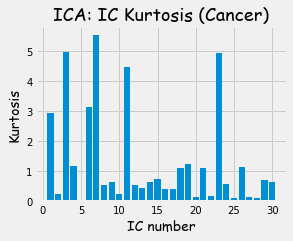

In [63]:
#plt.plot(kurts)
f = plt.figure()
plt.bar(range(1, 31), ic_kurts)
plt.xlabel('IC number', **vfont)
plt.ylabel('Kurtosis', **vfont)
plt.title('ICA: IC Kurtosis (Cancer)', **cfont)
plt.show()
f.savefig("cancer_16.pdf", bbox_inches='tight')



In [64]:
kurts = []
for i in range (1, 31):
    ica = FastICA(n_components=i, whiten=True)
    output =ica.fit_transform(X)
    kurt = np.average(np.abs(kurtosis(output)))
    kurts.append(kurt)

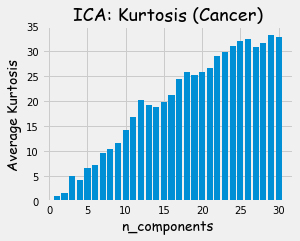

In [65]:
#plt.plot(kurts)
f = plt.figure()
plt.bar(range(1, 31), kurts)
plt.xlabel('n_components', **vfont)
plt.ylabel('Average Kurtosis', **vfont)
plt.title('ICA: Kurtosis (Cancer)', **cfont)
plt.show()
f.savefig("cancer_161.pdf", bbox_inches='tight')



In [66]:
acc=[]
for i in range (1, 31):
    ica = FastICA(n_components=i, whiten=True)
    X_ica =ica.fit_transform(X)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_ica, y)
    acc.append(clf.score(X_ica, y))

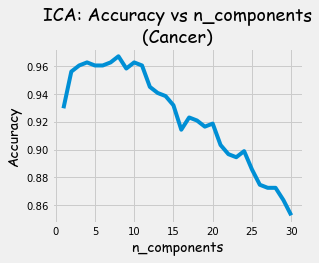

In [67]:
f = plt.figure()

plt.plot(range(1, 31), acc)
plt.xlabel('n_components', **vfont)
plt.ylabel('Accuracy', **vfont)
plt.title('ICA: Accuracy vs n_components\n(Cancer)', **cfont)
plt.show()
f.savefig("cancer_17.pdf", bbox_inches='tight')


plt.clf()

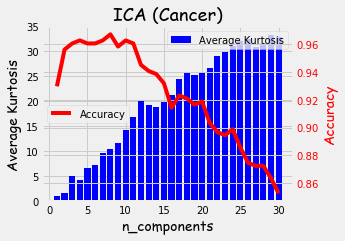

In [68]:
# final graph
f = plt.figure()
fig, ax1 = plt.subplots()
x_range = range(1, 31)
ax1.bar(x_range, kurts, color='blue', label='Average Kurtosis')
ax1.set_xlabel('n_components', **vfont)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Average Kurtosis', **vfont)
ax1.legend(loc=1)

#ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_range, acc, color='red', label='Accuracy')
ax2.set_ylabel('Accuracy', color='r', **vfont)
ax2.tick_params('y', colors='r')
ax2.legend(loc=6)

plt.title('ICA (Cancer)', **cfont)
plt.show()
fig.savefig("cancer_18.pdf", bbox_inches='tight')



## 2.3 Random Projection

why pca or rp
https://stats.stackexchange.com/questions/235632/pca-vs-random-projection

With very high dimensions, if speed is an issue, then consider that on a matrix of size n×kn×k, PCA takes O(k2×n+k3)O(k2×n+k3) time, whereas a random projection takes O(nkd)O(nkd), where you're projecting on a subspace of size dd.

With a sparse matrix its even faster.

The data may well be low-dimensional, but not in a linear subspace. PCA assumes this.

Random projection are also quite fast for reducing the dimension of a mixture of Gaussians.

If the data is very large, you don't need to hold it in memory for a random projections, whereas for PCA you do.

In general PCA works well on relatively low dimensional data.

Of course, PCA maintains the best possible projection. But it seems like you don't care about that for this purpose.

### RP parameter

In [69]:
acc1=[]
for i in range(1, 31):
    rp1 = SparseRandomProjection(n_components=i, random_state=10)
    X_rp1 =rp1.fit_transform(X)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_rp1, y)
    acc1.append(clf.score(X_rp1, y))

acc2=[]
for i in range(1, 31):
    rp2 = SparseRandomProjection(n_components=i, random_state=20)
    X_rp2 =rp2.fit_transform(X)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_rp2, y)
    acc2.append(clf.score(X_rp2, y))

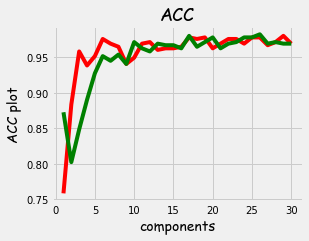

In [70]:
f = plt.figure()

plt.plot(range(1, 31), acc1, color='r')
plt.plot(range(1, 31), acc2, color='g')

plt.xlabel('components', **vfont)
plt.ylabel('ACC plot', **vfont)
plt.title('ACC', **cfont)
plt.show()
f.savefig("cancer_18x.pdf", bbox_inches='tight')



In [71]:
def reconstructionError(projections,X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    #reconstructed = ((p@W)@(X.T)).T # Unproject projected data
    reconstructed = (np.dot(np.dot(p, W), (X.T))).T # Unproject projected data
    errors = np.square(X-reconstructed)
    return np.sqrt(np.nanmean(errors)) #RMSE

In [44]:
acc_avg=[]
rmse_avg=[]
var =[]
for i in range(1, 31):
    acc=[]
    rmse=[]
    for rand in range(100):
        rp = SparseRandomProjection(n_components=i, random_state=rand)
        rp.fit(X)
        X_rp =rp.transform(X)
        #clf = DecisionTreeClassifier(max_depth=5)
        rmse.append(reconstructionError(rp, X))
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(X_rp, y)
        acc.append(clf.score(X_rp, y))
    acc_avg.append(np.average(acc))
    rmse_avg.append(np.average(rmse))
    var.append(variation(acc))

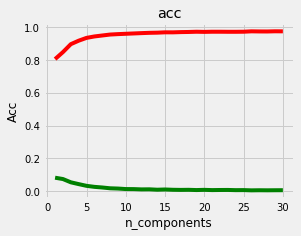

In [45]:
plt.plot(range(1, 31), acc_avg, color='r')
plt.plot(range(1, 31), var, color='g')

plt.xlabel('n_components')
plt.ylabel('Acc')
plt.title('acc')
plt.show()

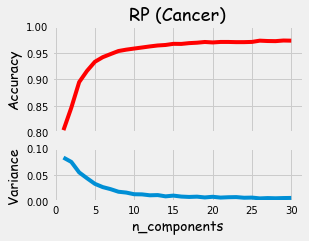

In [58]:
from matplotlib import gridspec

fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax1 = plt.subplot(gs[0])
ax1.plot(range(1, 31), acc_avg, color='r')
ax1.set_title('RP (Cancer)', **cfont)
ax1.set_ylim(0.8, 1)
ax1.set_ylabel('Accuracy', **vfont)

#the second subplot
# shared axis X
ax2 = plt.subplot(gs[1], sharex = ax1)
ax2.plot(range(1, 31), var)
ax2.set_ylim(0,0.1)
ax2.set_ylabel('Variance', **vfont)
ax2.set_xlabel('n_components', **vfont)
plt.setp(ax1.get_xticklabels(), visible=False)

# remove vertical gap between subplots
#plt.subplots_adjust(hspace=.0)
plt.show()
fig.savefig("cancer_31.pdf", bbox_inches='tight')



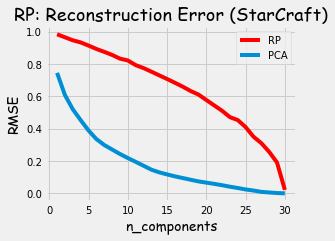

In [59]:
fig = plt.figure()
plt.plot(range(1, 31), rmse_avg, color='r', label='RP')
plt.plot(range(1, 31), rmse_pca, label='PCA')

plt.xlabel('n_components', **vfont)
plt.title('RP: Reconstruction Error (StarCraft)', **cfont)
plt.ylabel('RMSE', **vfont)
plt.legend(loc=1)
plt.show()
fig.savefig("cancer_32.pdf", bbox_inches='tight')



## 2.4 LDA

### LDA parameter
This is the relevant, dimension-reducing line of LDA.transform, it uses scalings_. As described in the docstring, scalings_ has maximally n_classes - 1 columns. This is then the maximal number of columns you can hope to obtain using transform. In your case, 2 classes (True, False), yields maximally 1 column.

In [52]:
score = []
lda=[]
lda.append(LDA().fit(X,y)) # default solver='svd'
lda.append(LDA(solver='lsqr', shrinkage='auto').fit(X, y))
lda.append(LDA(solver='lsqr', shrinkage=None).fit(X, y))
lda.append(LDA(solver='eigen', shrinkage='auto').fit(X, y))
lda.append(LDA(solver='eigen', shrinkage=None).fit(X, y))
for i in range(len(lda)):
    score.append(lda[i].score(X,y))

In [53]:
print(score)

[0.96923076923076923, 0.97142857142857142, 0.96923076923076923, 0.94945054945054941, 0.62637362637362637]


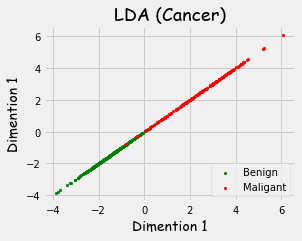

In [72]:
# sample distribution after LDA
lda = LDA().fit(X,y)
X_lda = lda.transform(X)
f = plt.figure()
k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Maligant']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_lda[j] for j in range(len(X_lda)) if y[j] == i])
    ax.scatter(points[:, 0], points[:, 0], s=7, c=colors[i], label=labels[i])
plt.xlabel("Dimention 1", **vfont)
plt.ylabel("Dimention 1", **vfont)
plt.legend(loc=4)
plt.title('LDA (Cancer)', **cfont)
fig.savefig("cancer_33.pdf", bbox_inches='tight')



# 3. Clustering with DR

### PCA - original

time:  0.0015549659729003906


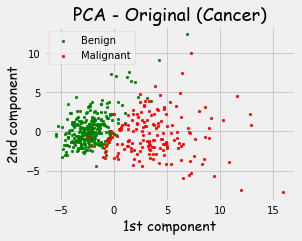

In [57]:
# PCA Plot
start = time()
X_pca = PCA(n_components=5).fit_transform(X)
print ('time: ', time() - start)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_pca[j] for j in range(len(X_pca)) if y[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])


# wrongly labeled points
#points = np.array([X[j] for j in range(len(X)) if y[j] != clusters_EM[j]])
#ax.scatter(points[:, 1], points[:, 2], s=80, facecolors='none', edgecolors='m', label='Wrongly Labeled')
plt.xlabel("1st component", **hfont)
plt.ylabel("2nd component", **hfont)
plt.legend(loc=2)
#plt.text(0.9, 0.9,'time: 3.8 ms', ha='center', va='center', transform=ax.transAxes)
plt.title('PCA - Original (Cancer)', **cfont)
fig.savefig("cancer_34.pdf", bbox_inches='tight')



### PCA Kmeans

In [122]:
#find optimized cluster number
sse_pca = []
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    Z = kmeans.fit_predict(X_pca)
    # cluster average within k-means SSE
    min_ = np.min(np.square(cdist(X_pca, kmeans.cluster_centers_, 'euclidean')), axis = 1)
    value = np.mean(min_)
    sse_pca.append(value)

time:  0.01697516441345215
wrongly labeled: 0.09010989010989011


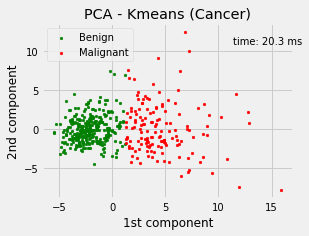

In [123]:
# PCA-kmeans Plot
start = time()
clf = KMeans(init='k-means++', n_clusters=2, random_state=42)
clf.fit_predict(X_pca)
print('time: ', time() - start)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
#clusters_kmeans = np.choose(clf.labels_, [1, 0])
clusters_kmeans = clf.labels_


fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_pca[j] for j in range(len(X_pca)) if clusters_kmeans[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

# wrongly labeled points
points = np.array([X_pca[j] for j in range(len(X_pca)) if y[j] != clusters_kmeans[j]])
#ax.scatter(points[:, 1], points[:, 2], s=80, facecolors='none', edgecolors='m', label='Wrongly Labeled')
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('PCA - Kmeans (Cancer)')
plt.text(0.9, 0.9,'time: 20.3 ms', ha='center', va='center', transform=ax.transAxes)
print('wrongly labeled:', 1.0*len(points)/len(X_pca))

### PCA - EM

In [124]:
#find optimized cluster number
ll_pca = []
for k in range(1,11):
    gmm = GMM(n_components=k, covariance_type='spherical')
    gmm.fit(X_pca)
    Z = gmm.predict(X_pca)
    ll_pca.append(gmm.score(X_pca))

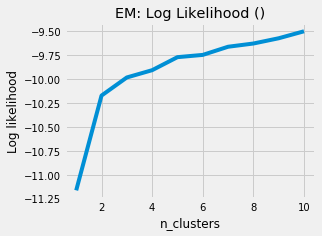

In [125]:
k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, ll_pca)

plt.title("EM: Log Likelihood ()")
plt.xlabel('n_clusters')
plt.ylabel('Log likelihood');
plt.show()

time:  0.004951000213623047
wrongly labeled: 0.1076923076923077


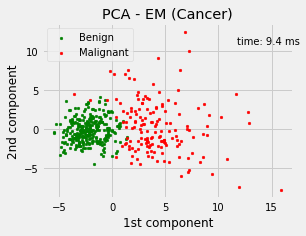

In [126]:
# PCA-EM Plot
start = time()
clf = GMM(n_components=2, covariance_type='spherical', random_state=42)
clf.fit(X_pca)
clusters_ = clf.predict(X_pca)
print('time: ', time() - start)

# fix labels
#clusters_EM = np.choose(clusters_, [1, 0])
clusters_EM = clusters_

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_pca[j] for j in range(len(X_pca)) if clusters_EM[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

# wrongly labeled points
points = np.array([X_pca[j] for j in range(len(X_pca)) if y[j] != clusters_EM[j]])
#ax.scatter(points[:, 1], points[:, 2], s=80, facecolors='none', edgecolors='m', label='Wrongly Labeled')
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('PCA - EM (Cancer)')
plt.text(0.9, 0.9,'time: 9.4 ms', ha='center', va='center', transform=ax.transAxes)
print('wrongly labeled:', 1.0*len(points)/len(X_pca))

## DR

In [75]:
X_pca = PCA(n_components=5).fit_transform(X)
ica = FastICA(n_components=9, whiten=True)
X_ica =ica.fit_transform(X)
rp = SparseRandomProjection(n_components=6, random_state=10)
X_rp =rp.fit_transform(X)
lda = LDA().fit(X,y)
X_lda = lda.transform(X)

## Kmeans compare

In [76]:
def calc_sse(dataset, clf):
    min_=np.min(np.square(cdist(dataset, clf.cluster_centers_, 'euclidean')), axis = 1)
    sse=np.mean(min_)
    return sse

In [77]:
#find optimized cluster number
sse_ori=[]
sse_pca = []
sse_ica=[]
sse_rp=[]
sse_lda=[]
for k in range(1,11):
    kmeans_ori = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_ori.fit(X)
    sse_ori.append(calc_sse(X, kmeans_ori))
    
    kmeans_pca = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_pca.fit(X_pca)
    sse_pca.append(calc_sse(X_pca, kmeans_pca))
    
    kmeans_ica = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_ica.fit(X_ica)
    sse_ica.append(calc_sse(X_ica, kmeans_ica))
    
    kmeans_rp = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_rp.fit(X_rp)
    sse_rp.append(calc_sse(X_rp, kmeans_rp))
    
    kmeans_lda = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans_lda.fit(X_lda)
    sse_lda.append(calc_sse(X_lda, kmeans_lda))
    

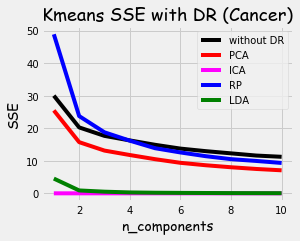

In [81]:
# plot sse
fig = plt.figure()
k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, sse_ori, color='black', label='without DR')
plt.plot(k, sse_pca, color='red', label='PCA')
plt.plot(k, sse_ica, color='magenta', label='ICA')
plt.plot(k, sse_rp, color='blue', label='RP')
plt.plot(k, sse_lda, color='green', label='LDA')

plt.legend(loc=1)
plt.title("Kmeans SSE with DR (Cancer)", **cfont)
plt.xlabel('n_components', **vfont)
plt.ylabel('SSE', **vfont);
plt.show()
fig.savefig("cancer_41.pdf", bbox_inches='tight')



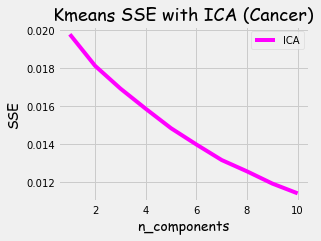

In [87]:
# plot sse
fig = plt.figure()

k = k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, sse_ica, color='magenta', label='ICA')

plt.legend(loc=1)
plt.title("Kmeans SSE with ICA (Cancer)", **cfont)
plt.xlabel('n_components', **vfont)
plt.ylabel('SSE', **vfont);
plt.show()
fig.savefig("cancer_42.pdf", bbox_inches='tight')



## EM compare

In [83]:
ll_ori=[]
ll_pca = []
ll_ica=[]
ll_rp=[]
ll_lda=[]
for k in range(1,11):
    gmm_ori = GMM(n_components=k, covariance_type='spherical')
    gmm_ori.fit(X)
    ll_ori.append(gmm_ori.score(X))
    
    gmm_pca = GMM(n_components=k, covariance_type='spherical')
    gmm_pca.fit(X_pca)
    ll_pca.append(gmm_pca.score(X_pca))

    gmm_ica = GMM(n_components=k, covariance_type='spherical')
    gmm_ica.fit(X_ica)
    ll_ica.append(gmm_ica.score(X_ica))
    
    gmm_rp = GMM(n_components=k, covariance_type='spherical')
    gmm_rp.fit(X_rp)
    ll_rp.append(gmm_rp.score(X_rp))
    
    gmm_lda = GMM(n_components=k, covariance_type='spherical')
    gmm_lda.fit(X_lda)
    ll_lda.append(gmm_lda.score(X_lda))

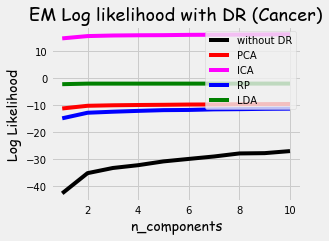

In [86]:
# plot sse
fig = plt.figure()
k = k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, ll_ori, color='black', label='without DR')
plt.plot(k, ll_pca, color='red', label='PCA')
plt.plot(k, ll_ica, color='magenta', label='ICA')
plt.plot(k, ll_rp, color='blue', label='RP')
plt.plot(k, ll_lda, color='green', label='LDA')

plt.legend(loc=1)
plt.title("EM Log likelihood with DR (Cancer)", **cfont)
plt.xlabel('n_components', **vfont)
plt.ylabel('Log Likelihood', **vfont);
plt.show()
fig.savefig("cancer_43.pdf", bbox_inches='tight')



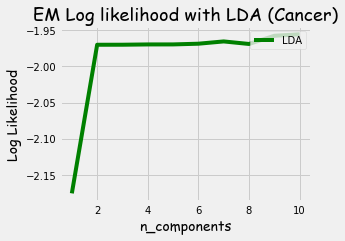

In [88]:
# plot sse
fig = plt.figure()


k = k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, ll_lda, color='green', label='LDA')

plt.legend(loc=1)
plt.title("EM Log likelihood with LDA (Cancer)", **cfont)
plt.xlabel('n_components', **vfont)
plt.ylabel('Log Likelihood', **vfont);
plt.show()
fig.savefig("cancer_44.pdf", bbox_inches='tight')



## Clustering time

In [151]:
# Kmeans
k = 2

start = time()
kmeans_ori = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans_ori.fit(X)
print ('ori time', time() - start)

start = time()
kmeans_pca = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans_pca.fit(X_pca)
print ('pca time', time() - start)

start = time()
kmeans_ica = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans_ica.fit(X_ica)
print ('ica time', time() - start)

start = time()
kmeans_rp = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans_rp.fit(X_rp)
print ('rp time', time() - start)

start = time()    
kmeans_lda = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans_lda.fit(X_lda)
print ('lda time', time() - start)

ori time 0.02471017837524414
pca time 0.019650936126708984
ica time 0.024487018585205078


ValueError: Found array with dim 3. Estimator expected <= 2.

In [149]:
# EM
k = 2

start = time()
gmm_ori = GMM(n_components=k, covariance_type='spherical')
gmm_ori.fit(X)
print ('ori time', time() - start ) 

gmm_pca = GMM(n_components=k, covariance_type='spherical')
gmm_pca.fit(X_pca)
print ('pca time', time() - start)

gmm_ica = GMM(n_components=k, covariance_type='spherical')
gmm_ica.fit(X_ica)
print ('ica time', time() - start)
    
gmm_rp = GMM(n_components=k, covariance_type='spherical')
gmm_rp.fit(X_rp)
print ('rp time', time() - start)
    
gmm_lda = GMM(n_components=k, covariance_type='spherical')
gmm_lda.fit(X_lda)
print ('lda time', time() - start)

ori time 0.006886959075927734
pca time 0.012761831283569336
ica time 0.021503925323486328


ValueError: Found array with dim 3. Estimator expected <= 2.

## ICA plot

In [ ]:
# ica original
k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_ica[j] for j in range(len(X_ica)) if y[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('ICA - original (Cancer)')

In [ ]:
# ICA - Kmeans
clf = KMeans(init='k-means++', n_clusters=2, random_state=42)
clf.fit_predict(X_ica)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
clusters_kmeans = np.choose(clf.labels_, [1, 0])
#clusters_kmeans=kmeans_ica.labels

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_ica[j] for j in range(len(X_ica)) if clusters_kmeans[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('ICA - Kmeans (Cancer)')

In [ ]:
# ICA - EM
clf = GMM(n_components=2, covariance_type='spherical', random_state=42)
clf.fit(X_ica)
clusters_ = clf.predict(X_ica)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
clusters_EM = np.choose(clusters_, [1, 0])
#clusters_kmeans=kmeans_ica.labels

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_ica[j] for j in range(len(X_ica)) if clusters_EM[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('ICA - EM (Cancer)')

## RP

In [ ]:
# rp original
k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_rp[j] for j in range(len(X_rp)) if y[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('RP - original (Cancer)')

In [ ]:
# RP - Kmeans
clf = KMeans(init='k-means++', n_clusters=2, random_state=42)
clf.fit_predict(X_rp)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
#clusters_kmeans = np.choose(clf.labels_, [1, 0])
clusters_kmeans=clf.labels_

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_rp[j] for j in range(len(X_rp)) if clusters_kmeans[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('RP - Kmeans (Cancer)')

In [ ]:
# RP - EM
clf = GMM(n_components=2, covariance_type='spherical', random_state=42)
clf.fit(X_rp)
clusters_ = clf.predict(X_rp)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
#clusters_EM = np.choose(clusters_, [1, 0])
clusters_EM=clusters_

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_rp[j] for j in range(len(X_rp)) if clusters_EM[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(loc=2)
plt.title('RP - EM (Cancer)')

## LDA plot

In [ ]:
# lda original
k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_lda[j] for j in range(len(X_lda)) if y[j] == i])
    ax.scatter(points[:, 0], points[:, 0], s=7, c=colors[i], label=labels[i])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 1")
plt.legend(loc=2)
plt.title('LDA - original (Cancer)')

In [ ]:
# LDa - Kmeans
clf = KMeans(init='k-means++', n_clusters=2, random_state=42)
clf.fit_predict(X_lda)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
#clusters_kmeans = np.choose(clf.labels_, [1, 0])
clusters_kmeans=clf.labels_

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_lda[j] for j in range(len(X_lda)) if clusters_kmeans[j] == i])
    ax.scatter(points[:, 0], points[:, 0], s=7, c=colors[i], label=labels[i])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 1")
plt.legend(loc=2)
plt.title('LDA - Kmeans (Cancer)')

In [ ]:
# LDA - EM
clf = GMM(n_components=2, covariance_type='spherical', random_state=42)
clf.fit(X_lda)
clusters_ = clf.predict(X_lda)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
#clusters_EM = np.choose(clusters_, [1, 0])
clusters_EM=clusters_

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_lda[j] for j in range(len(X_lda)) if clusters_EM[j] == i])
    ax.scatter(points[:, 0], points[:, 0], s=7, c=colors[i], label=labels[i])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 1")
plt.legend(loc=2)
plt.title('LDA - EM (Cancer)')

# 4. Neural Networks with DR

## MLP helper function

In [ ]:
# mlp learner helper function
def mlp_learner(input_layer_size, X_train, X_test):
    # set learning_rate and momentum
    learning_rate = 0.1
    momentum = 0.5
    # hidden_layer_size = (input layer + output layer) / 2
    size = (input_layer_size + 2) // 2 
    
    # mlp classifier
    mlp = MLPClassifier(hidden_layer_sizes=(size,),
                        solver='sgd',
                        learning_rate_init=learning_rate, 
                        momentum=momentum,
                        max_iter=10000)
    start = time()
    clf = mlp.fit(X_train, y)
    train_time = time() - start

    # train
    y_predict = clf.predict(X_train)
    train_acc = accuracy_score(y, y_predict)

    # test
    y_test_predict = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_predict)
    
    # return
    return train_acc, test_acc, train_time

## 4.0 Original MLP

In [ ]:
train_acc, test_acc, train_time = mlp_learner(30, X, X_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

## 4.1 PCA - MLP

In [ ]:
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
X_test_pca = pca.transform(X_test)

In [ ]:
# pca
train_acc, test_acc, train_time = mlp_learner(5, X_pca, X_test_pca)
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time

## 4.2 ICA - MLP

In [136]:
ica = FastICA(n_components=9, whiten=True)
ica.fit(X)
X_ica =ica.transform(X)
X_ica_test = ica.transform(X_test)

In [137]:
# ica
train_acc, test_acc, train_time = mlp_learner(9, X_ica, X_ica_test)
print 'train acc: ', train_acc
print 'test acc: ', test_acc
print 'train time: ', train_time

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-137-814b34b433b6>, line 3)

## 4.3 Random Projection - MLP

In [138]:
rp = SparseRandomProjection(n_components=6, random_state=20)

In [139]:
X_rp=[]
X_rp_test=[]
var =[]
for rand in range(100):
    rp = SparseRandomProjection(n_components=6, random_state=rand)
    rp.fit(X)
    X_rp.append(rp.transform(X))
    X_rp_test.append(rp.transform(X_test))

X_rp_mean = np.mean(X_rp,axis=0)
X_rp_test_mean = np.mean(X_rp_test, axis=0)
print(X_rp_mean.shape)
print(X_rp_test_mean.shape)

(455, 6)
(114, 6)


In [140]:
# rp
train_acc, test_acc, train_time = mlp_learner(6, X_rp_mean, X_rp_test_mean)
print('train acc: ', train_acc)
print('test acc: ', test_acc)
print('train time: ', train_time)

NameError: name 'mlp_learner' is not defined

## LDA - MLP

In [141]:
lda = LDA().fit(X,y)
X_lda = lda.transform(X)
X_lda_test = lda.transform(X_test)

In [142]:
# ica
train_acc, test_acc, train_time = mlp_learner(1, X_lda, X_lda_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

NameError: name 'mlp_learner' is not defined

In [143]:
X_lda_test

array([[-1.80443002],
       [-1.5551511 ],
       [-0.06601407],
       [-1.23691168],
       [-2.26886769],
       [ 2.14640414],
       [-0.39390568],
       [ 0.14642794],
       [ 1.52006173],
       [-0.84711355],
       [-1.83124327],
       [ 4.03273959],
       [ 2.34991617],
       [-1.99601415],
       [ 4.23577874],
       [-0.21282087],
       [-2.09360751],
       [-0.5640106 ],
       [-1.74595781],
       [ 0.0653387 ],
       [ 1.64483961],
       [ 2.71983021],
       [ 1.06327737],
       [ 3.35803477],
       [ 3.05785395],
       [-1.18981121],
       [-0.97722685],
       [-2.6369169 ],
       [-1.15758587],
       [ 2.14145467],
       [-0.40658771],
       [ 2.4560802 ],
       [-0.06395118],
       [ 3.14023313],
       [-1.09094971],
       [-1.00723444],
       [-1.55362375],
       [-3.65686163],
       [-2.64359058],
       [ 3.84918578],
       [-0.3437341 ],
       [-0.21016251],
       [ 0.00943833],
       [ 1.3467505 ],
       [-0.10842141],
       [-2

# 5. NN with Clustering

In [144]:
# original MLP
train_acc, test_acc, train_time = mlp_learner(30, X, X_test)
print('train acc: ', train_acc)
print('test acc: ', test_acc)
print('train time: ', train_time)

NameError: name 'mlp_learner' is not defined

## 5.1 Kmeans as new feature

In [100]:
# K means with 2 cluster
kmeans1 = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans1.fit(X)
feature_kmeans1 = kmeans1.predict(X)
feature_kmeans1_test = kmeans1.predict(X_test)

In [101]:
# feature_kmeans1 as new additional feature
X_orig_kmeans1 = np.column_stack((X, feature_kmeans1))
X_orig_kmeans1_test = np.column_stack((X_test, feature_kmeans1_test))
train_acc, test_acc, train_time = mlp_learner(31, X_orig_kmeans1, X_orig_kmeans1_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

train acc:  0.993406593407
test acc:  0.938596491228
train time:  0.18517613410949707


In [110]:
# feature_kmeans1 as the only feature
X_kmeans1 = X_orig_kmeans1[:,-1:]
X_kmeans1_test = X_orig_kmeans1_test[:,-1:]
train_acc, test_acc, train_time = mlp_learner(1, X_kmeans1, X_kmeans1_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

train acc:  0.90989010989
test acc:  0.877192982456
train time:  0.05317401885986328


In [111]:
# K means with k clusters (5 different k)
k = [2,4,6,8,10]
features = []
features_test = []
for i in range(len(k)):
    kmeans = KMeans(init='k-means++', n_clusters=k[i], n_init=10)
    kmeans.fit(X)
    features.append(kmeans.predict(X))
    features_test.append(kmeans.predict(X_test))

# 5 features only
X_kmeans5 = np.column_stack((features[0],features[1],features[2],
                             features[3],features[4]))
X_kmeans5_test = np.column_stack((features_test[0],features_test[1],features_test[2],
                                  features_test[3],features_test[4]))

# 5 features as new additional feature
X_orig_kmeans5 = np.column_stack((X, X_kmeans5))
X_orig_kmeans5_test = np.column_stack((X_test, X_kmeans5_test))

In [112]:
# 5 features only - mlp
train_acc, test_acc, train_time = mlp_learner(5, X_kmeans5, X_kmeans5_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

train acc:  0.751648351648
test acc:  0.80701754386
train time:  0.05975174903869629


In [113]:
# 5 features as new additional feature - mlp
train_acc, test_acc, train_time = mlp_learner(35, X_orig_kmeans5, X_orig_kmeans5_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

train acc:  0.989010989011
test acc:  0.938596491228
train time:  0.08546686172485352


## 5.2 EM as new Feature

In [114]:
# EM with 2 cluster
gmm1 = GMM(n_components=2, covariance_type='spherical')
gmm1.fit(X)
feature_gmm1 = gmm1.predict(X)
feature_gmm1_test = gmm1.predict(X_test)

In [115]:
# feature_gmm1 as new additional feature
X_orig_gmm1 = np.column_stack((X, feature_gmm1))
X_orig_gmm1_test = np.column_stack((X_test, feature_gmm1_test))
train_acc, test_acc, train_time = mlp_learner(31, X_orig_gmm1, X_orig_gmm1_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

train acc:  0.993406593407
test acc:  0.947368421053
train time:  0.2263350486755371


In [116]:
# feature_gmm1 as the only feature
X_gmm1 = X_orig_gmm1[:,-1:]
X_gmm1_test = X_orig_gmm1_test[:,-1:]
train_acc, test_acc, train_time = mlp_learner(1, X_gmm1, X_gmm1_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

train acc:  0.881318681319
test acc:  0.850877192982
train time:  0.05662417411804199


In [107]:
# EM with k clusters (5 different k)
k = [2,4,6,8,10]
features = []
features_test = []
for i in range(len(k)):
    gmm = GMM(n_components=2, covariance_type='spherical')
    gmm.fit(X)
    features.append(gmm.predict(X))
    features_test.append(gmm.predict(X_test))

# 5 features only
X_gmm5 = np.column_stack((features[0],features[1],features[2],
                             features[3],features[4]))
X_gmm5_test = np.column_stack((features_test[0],features_test[1],features_test[2],
                                  features_test[3],features_test[4]))

# 5 features as new additional feature
X_orig_gmm5 = np.column_stack((X, X_gmm5))
X_orig_gmm5_test = np.column_stack((X_test, X_gmm5_test))

In [145]:
# 5 features as new additional feature - mlp
train_acc, test_acc, train_time = mlp_learner(35, X_orig_gmm5, X_orig_gmm5_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

NameError: name 'mlp_learner' is not defined

In [146]:
# 5 features only - mlp
train_acc, test_acc, train_time = mlp_learner(5, X_gmm5, X_gmm5_test)
print ('train acc: ', train_acc)
print ('test acc: ', test_acc)
print ('train time: ', train_time)

NameError: name 'mlp_learner' is not defined